## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [2]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv("Titanic_test.csv")
df_train = pd.read_csv("Titanic_train.csv")


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [6]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

print(df_test.info())
print(df_train.info())


#Ans: train資料有有Survived欄位變數,test資料集並沒有

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [7]:
#可以嘗試用範例的程式
print(df_test.isnull().any())
print(df_train.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [9]:
#合併資料
data = pd.concat([df_test, df_train], ignore_index=True)

print(data.isnull().sum())
#從合併資料可看到遺失值為: age,cabin, embarked,survived 

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64


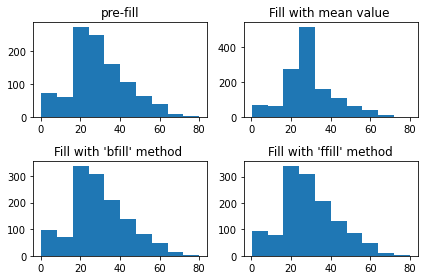

In [18]:
# 以 XXX 為例，先看 Cabin  出現值的特性


#建立補值前的表格
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(data['Age'])
axes[0, 0].set_title("pre-fill")

#以年齡為例,利用平均值補值
data_mean = data.copy()
data_mean['Age'] = data_mean['Age'].fillna(data_mean['Age'].mean())
axes[0, 1].hist(data_mean['Age'])
axes[0, 1].set_title("Fill with mean value ")
#以bfill方法補值
data_bfill = data.copy()
data_bfill['Age'] = data_bfill['Age'].fillna(method = 'bfill')
axes[1, 0].hist(data_bfill['Age'])
axes[1, 0].set_title("Fill with 'bfill' method ")

#以ffill方法補值
data_ffill = data.copy()
data_ffill['Age'] = data_ffill['Age'].fillna(method = 'ffill')
axes[1, 1].hist(data_ffill['Age'])
axes[1, 1].set_title("Fill with 'ffill' method")

fig.tight_layout()

#ANS:比較不同方法補值後,發現bfill和ffill最接近補值前的圖形,為適合的方法

In [28]:
#接下來以cabin為例,從之前的資料可知道cabin 遺失值有1014個

# 填補所有的 NaN 為 "N"
df_N = data.copy()
df_N['Cabin'] = df_N['Cabin'].fillna("No cabin")
df_N['Cabin'].isnull().any()
#瑱捕後,則顯示"False"沒有遺失值

False

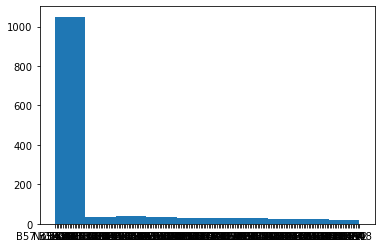

In [32]:
#建立圖表觀察分布
plt.hist(df_N["Cabin"])
plt.show()
#經圖表可見cabin是以艙等加上房號登記,必須簡化分類

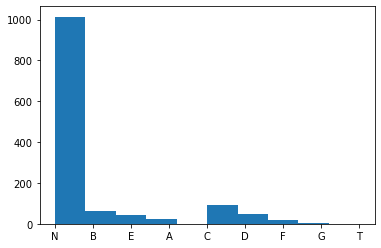

In [33]:
#利用string slice 擷取出艙等代號
df_N['Cabin_code'] = df_N['Cabin'].str.slice(0, 1)

#別的同學做法是這樣,需要進一步比較哪一個較好
#data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')
#data['Cabin'].unique()

df_N.head()
#圖表簡化後較易觀察數值
plt.hist(df_N["Cabin_code"])
plt.show()

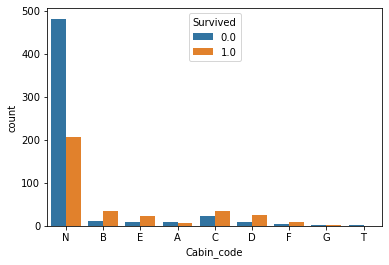

In [34]:
sns.countplot(data = df_N, x = 'Cabin_code', hue = 'Survived')
plt.show()


In [36]:
df_N.groupby('Cabin_code', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)
#結果分析:艙等與存活率的關係,可看到D、E、B、F艙存活率均有大於60%,而艙等不明者(N)存活率最低

,Cabin_code,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,N,0.299854
8,T,0.000000
